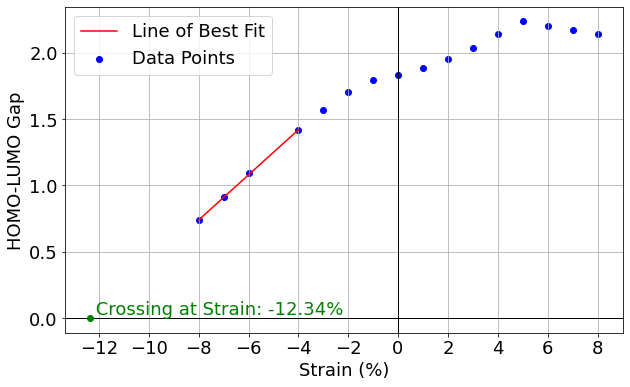

The line crosses the x-axis at strain = -12.34%
Plot saved to C:\Users\jeepr\Documents\1. Physics\Year 3\Disertation\DFT\Python\Semiconductor to Metal\Semiconductor_to_metal_transition_prediction.png


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data_path = r"C:\Users\jeepr\Documents\1. Physics\Year 3\Disertation\DFT\Python\C_Strain\extracted_data.csv"
df = pd.read_csv(data_path)

df['Strain Numeric'] = df['Strain'].apply(
    lambda x: int(x.replace('percent', '').replace('+', '').replace('-', '')) if '-' not in x else -int(x.replace('percent', '').replace('-', ''))
)

strain_data = df[(df['Strain'] == "-4percent") | (df['Strain'] == "-8percent")]

slope, intercept, r_value, p_value, std_err = stats.linregress(strain_data['Strain Numeric'], strain_data['HOMO-LUMO'])

strain_values = np.linspace(-8, -4, 100)
best_fit_values = slope * strain_values + intercept

plt.figure(figsize=(10, 6))
plt.scatter(df['Strain Numeric'], df['HOMO-LUMO'], color='blue', label='Data Points')
plt.plot(strain_values, best_fit_values, color='red', label='Line of Best Fit')
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

cross_x = -intercept / slope

plt.scatter(cross_x, 0, color='green', zorder=5)
plt.text(cross_x, 0, f' Crossing at Strain: {cross_x:.2f}%', color='green',
         fontsize=18, verticalalignment='bottom')

plt.xlabel('Strain (%)', fontsize=18)
plt.ylabel('HOMO-LUMO Gap', fontsize=18)
# Title removed
plt.legend(fontsize=18)
plt.grid(True)

# Set x-ticks from +8 to -13 with integer steps
plt.xticks(np.arange(8, -14, -2), fontsize=18)

# Increase y-tick font size
plt.yticks(fontsize=18)

save_path = r"C:\Users\jeepr\Documents\1. Physics\Year 3\Disertation\DFT\Python\Semiconductor to Metal\Semiconductor_to_metal_transition_prediction.png"
plt.savefig(save_path)

plt.show()

print(f"The line crosses the x-axis at strain = {cross_x:.2f}%")
print(f"Plot saved to {save_path}")
